Training with relu activation, 128 hidden units, learning rate=0.001, batch size=32, epochs=10...
Training with relu activation, 128 hidden units, learning rate=0.001, batch size=32, epochs=20...
Training with relu activation, 128 hidden units, learning rate=0.001, batch size=64, epochs=10...
Training with relu activation, 128 hidden units, learning rate=0.001, batch size=64, epochs=20...
Training with relu activation, 128 hidden units, learning rate=0.001, batch size=128, epochs=10...
Training with relu activation, 128 hidden units, learning rate=0.001, batch size=128, epochs=20...
Training with relu activation, 128 hidden units, learning rate=0.01, batch size=32, epochs=10...
Training with relu activation, 128 hidden units, learning rate=0.01, batch size=32, epochs=20...
Training with relu activation, 128 hidden units, learning rate=0.01, batch size=64, epochs=10...
Training with relu activation, 128 hidden units, learning rate=0.01, batch size=64, epochs=20...
Training with relu act

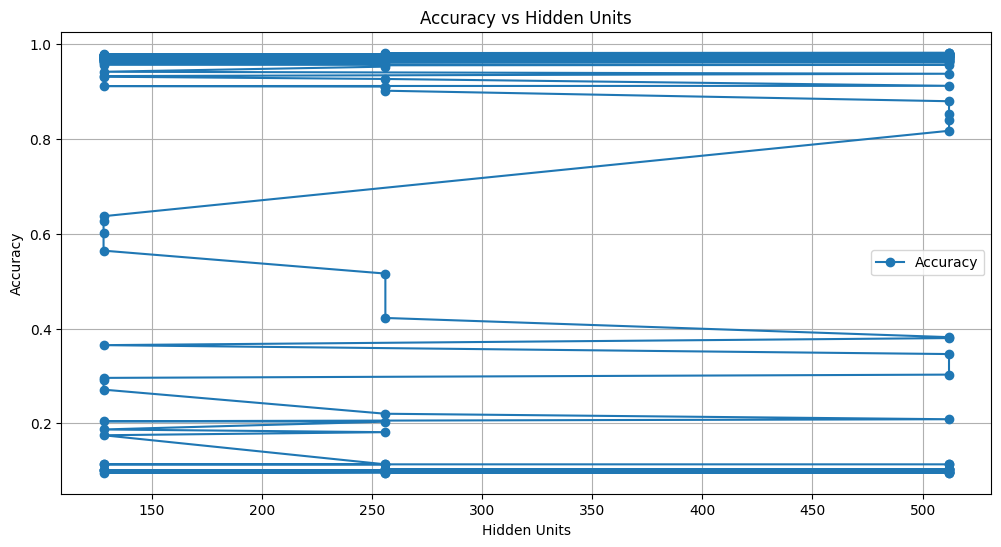

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

# Function to build the neural network model
def build_model(activation_function, hidden_units, learning_rate):
    model = Sequential()
    
    # Input layer (784 input neurons for MNIST images flattened to 1D vector)
    model.add(Dense(hidden_units, input_dim=784, activation=activation_function))
    
    # Hidden layer
    model.add(Dense(hidden_units, activation=activation_function))
    
    # Output layer (10 output neurons for MNIST digits)
    model.add(Dense(10, activation='softmax'))
    
    # Optimizer with a variable learning rate
    optimizer = Adam(learning_rate=learning_rate)
    
    # Compile the model
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Flatten the input data from 28x28 pixels to a 1D array of size 784
x_train = x_train.reshape(x_train.shape[0], 784).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 784).astype('float32') / 255

# Split the data further into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Hyperparameters to evaluate
activations = ['relu', 'sigmoid', 'tanh']
hidden_sizes = [128, 256, 512]
learning_rates = [0.001, 0.01, 0.1]
batch_sizes = [32, 64, 128]
epochs = [10, 20]

# Store results for comparison
results = []

# Loop over all hyperparameter combinations
for activation in activations:
    for hidden_units in hidden_sizes:
        for lr in learning_rates:
            for batch_size in batch_sizes:
                for epoch in epochs:
                    print(f"Training with {activation} activation, {hidden_units} hidden units, "
                          f"learning rate={lr}, batch size={batch_size}, epochs={epoch}...")
                    
                    # Build the model with the current hyperparameters
                    model = build_model(activation, hidden_units, lr)
                    
                    # Train the model
                    history = model.fit(x_train, y_train, validation_data=(x_val, y_val), 
                                        epochs=epoch, batch_size=batch_size, verbose=0)
                    
                    # Evaluate the model on the test set
                    loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
                    
                    # Save the results for comparison
                    results.append({
                        'activation': activation,
                        'hidden_units': hidden_units,
                        'learning_rate': lr,
                        'batch_size': batch_size,
                        'epochs': epoch,
                        'accuracy': accuracy,
                        'loss': loss
                    })

# Convert results into a DataFrame for easy analysis
results_df = pd.DataFrame(results)

# Ensure that the relevant columns are numeric for plotting
results_df['Hidden Units'] = pd.to_numeric(results_df['hidden_units'], errors='coerce')
results_df['Accuracy'] = pd.to_numeric(results_df['accuracy'], errors='coerce')

# Drop rows where either 'Hidden Units' or 'Accuracy' is NaN
results_df = results_df.dropna(subset=['Hidden Units', 'Accuracy'])

# Sort by accuracy to see the best performing configurations
results_df_sorted = results_df.sort_values(by='Accuracy', ascending=False)

# Print the best results
print(results_df_sorted.head())

# Plot performance comparison
fig, ax = plt.subplots(figsize=(12, 6))
results_df_sorted.plot(x='Hidden Units', y='Accuracy', ax=ax, kind='line', marker='o', linestyle='-', title="Accuracy vs Hidden Units")
plt.xlabel("Hidden Units")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()
